In [1]:
import xarray as xr
import pandas as pd

import cftime
import numpy as np

from oggm import cfg

In [108]:
# with xr.open_dataset('/home/users/fmaussion/www_oggm/climate/era5/monthly/v1.1/era5_monthly_prcp_1979-2019.nc') as dse:
#    dse = dse
# dse

In [109]:
with xr.open_dataset('orig/P_monthly.nc') as ds:
    ds = ds.load()

In [110]:
# Avoid year zero and align with temp
ds = ds.sel(year=slice(1, 2023))

In [112]:
# Assume ds is your Dataset
# Create a full time index
months = ds.month.values
years = ds.year.values

# Broadcast year and month in correct order
year_grid, month_grid = xr.broadcast(ds.year, ds.month)

# Flatten both
years = year_grid.values.ravel()
months = month_grid.values.ravel()

# Create cftime datetime objects (assuming 15th of each month)
# Choose the appropriate calendar, e.g., 'standard', 'noleap', '360_day'
calendar = 'noleap'  # or change as needed
cftime_dates = np.array([
    cftime.num2date(
        cftime.date2num(cftime.DatetimeNoLeap(y, m, 1), units='days since 0001-01-01', calendar=calendar),
        units='days since 0001-01-01',
        calendar=calendar
    )
    for y, m in zip(years, months)
])

# Stack 'month' and 'year' into a single 'time' dimension
precip = ds.P_monthly.stack(time=("year", "month"))
precip["time"] = cftime_dates

# Unstack lon, lat
precip = precip.transpose("lon", "lat", "time")

# Convert to stupid unit
precip = precip * 1000 
dimo = np.array([cfg.DAYS_IN_MONTH[m - 1] for m in precip['time.month']])
precip = precip / (dimo * (60 * 60 * 24))
precip['units'] = 'kg m-2 s-1'

# Wrap into new Dataset if needed
ds_new = xr.Dataset({"pr": precip})

In [113]:
ds_new.to_netcdf('unstacked/p_monthly.nc')

In [114]:
ts = ds_new.pr.sel(lat=46.806783, lon=10.775030, method='nearest') * dimo * (60 * 60 * 24)

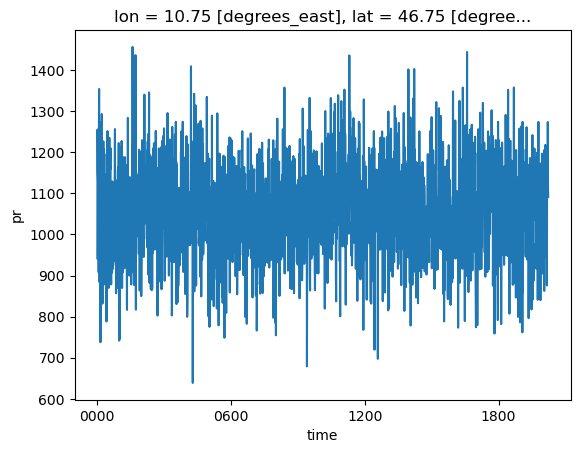

In [115]:
ts.resample(time='YS').sum().plot();

In [116]:
with xr.open_dataset('orig/Tp_monthly.nc') as ds:
    ds = ds.load()

In [117]:
# Avoid year zero and align with temp
ds = ds.sel(year=slice(1, 2023))

In [118]:
# Assume ds is your Dataset
# Create a full time index
months = ds.month.values
years = ds.year.values

# Broadcast year and month in correct order
year_grid, month_grid = xr.broadcast(ds.year, ds.month)

# Flatten both
years = year_grid.values.ravel()
months = month_grid.values.ravel()

# Create cftime datetime objects (assuming 15th of each month)
# Choose the appropriate calendar, e.g., 'standard', 'noleap', '360_day'
calendar = 'noleap'  # or change as needed
cftime_dates = np.array([
    cftime.num2date(
        cftime.date2num(cftime.DatetimeNoLeap(y, m, 1), units='days since 0001-01-01', calendar=calendar),
        units='days since 0001-01-01',
        calendar=calendar
    )
    for y, m in zip(years, months)
])

# Stack 'month' and 'year' into a single 'time' dimension
temp = ds.Tp_monthly.stack(time=("year", "month"))
temp["time"] = cftime_dates

# Unstack lon, lat
temp = temp.transpose("lon", "lat", "time")

# Wrap into new Dataset if needed
ds_new = xr.Dataset({"tas": temp + 273.15})

In [119]:
ds_new.to_netcdf('unstacked/tp_monthly.nc')

In [124]:
ts = ds_new.tas.sel(lat=46.806783, lon=10.775030, method='nearest') - 273.15

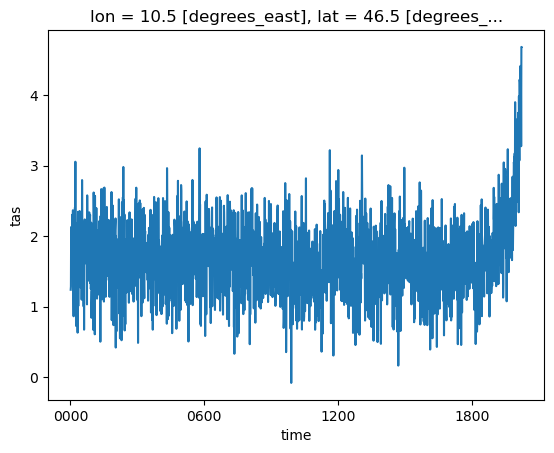

In [125]:
ts.resample(time='YS').mean().plot();

In [126]:
with xr.open_dataset('orig/TpNAT_monthly.nc') as ds:
    ds = ds.load()

In [127]:
# Avoid year zero and align with temp
ds = ds.sel(year=slice(1, 2023))

In [128]:
ds

<xarray.Dataset>
Dimensions:        (lon: 14, lat: 8, month: 12, year: 2020)
Coordinates:
  * lon            (lon) float32 4.5 5.5 6.5 7.5 8.5 ... 14.5 15.5 16.5 17.5
  * lat            (lat) float32 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5
  * month          (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * year           (year) uint16 1 2 3 4 5 6 7 ... 2015 2016 2017 2018 2019 2020
Data variables:
    TpNAT_monthly  (lon, lat, month, year) float32 11.79 12.47 ... -1.474 -2.377

In [129]:
# Assume ds is your Dataset
# Create a full time index
months = ds.month.values
years = ds.year.values

# Broadcast year and month in correct order
year_grid, month_grid = xr.broadcast(ds.year, ds.month)

# Flatten both
years = year_grid.values.ravel()
months = month_grid.values.ravel()

# Create cftime datetime objects (assuming 15th of each month)
# Choose the appropriate calendar, e.g., 'standard', 'noleap', '360_day'
calendar = 'noleap'  # or change as needed
cftime_dates = np.array([
    cftime.num2date(
        cftime.date2num(cftime.DatetimeNoLeap(y, m, 1), units='days since 0001-01-01', calendar=calendar),
        units='days since 0001-01-01',
        calendar=calendar
    )
    for y, m in zip(years, months)
])

# Stack 'month' and 'year' into a single 'time' dimension
temp = ds.TpNAT_monthly.stack(time=("year", "month"))
temp["time"] = cftime_dates

# Unstack lon, lat
temp = temp.transpose("lon", "lat", "time")

# Wrap into new Dataset if needed
ds_new = xr.Dataset({"tas": temp + 273.15})

In [130]:
ds_new.to_netcdf('unstacked/tp_nat_monthly.nc')

In [132]:
ts_nat = ds_new.tas.sel(lat=46.806783, lon=10.775030, method='nearest') - 273.15

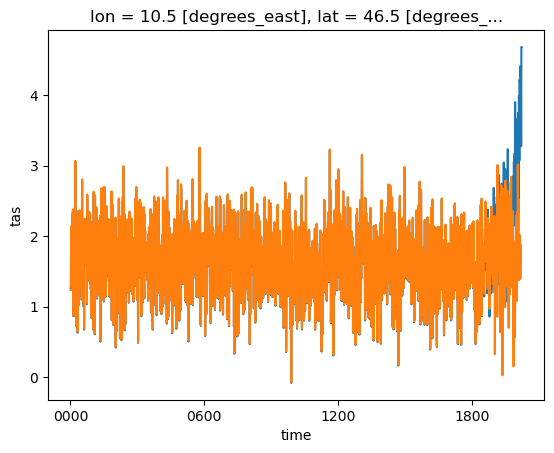

In [133]:
ts.resample(time='YS').mean().plot();
ts_nat.resample(time='YS').mean().plot();

In [7]:
with xr.open_dataset('orig/elevation_alps.nc') as ds:
    ds = ds.load()

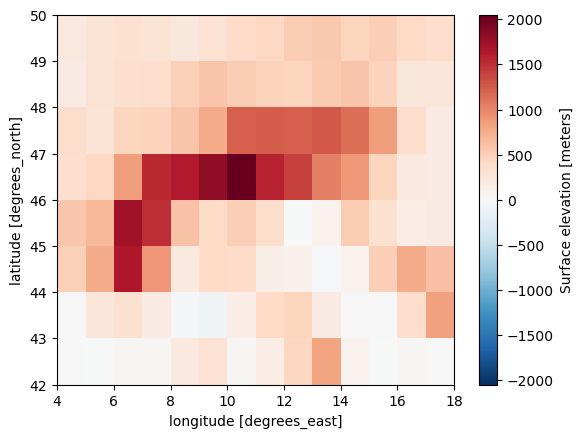

In [8]:
ds.elevation.plot();

In [11]:
ds = ds.rename({'longitude':'lon', 'latitude':'lat'})

ValueError: cannot rename 'longitude' because it is not a variable or dimension in this dataset

In [12]:
ds.to_netcdf('unstacked/elev.nc')

In [13]:
ds

<xarray.Dataset>
Dimensions:    (lat: 8, lon: 14)
Coordinates:
  * lat        (lat) float64 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5
  * lon        (lon) float64 4.5 5.5 6.5 7.5 8.5 ... 13.5 14.5 15.5 16.5 17.5
Data variables:
    elevation  (lat, lon) float64 15.56 -7.001 16.9 24.85 ... 506.6 409.1 380.7